## 선형회귀

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### 단순선형회귀 모델 만들기

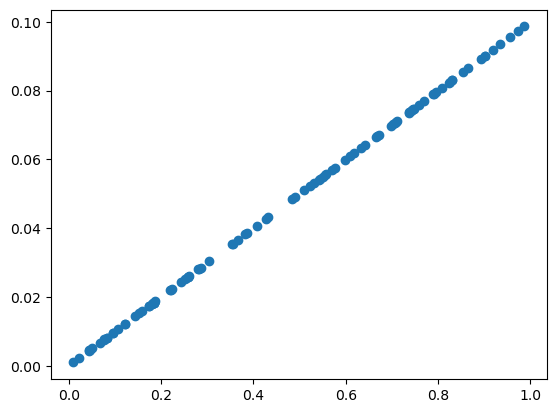

In [4]:
X= np.random.rand(100)
y=0.2 * X * 0.5  #ax+n
plt.scatter(X,y)

In [5]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

#### 경사하강법

In [ ]:
# y=wX+b    w결정
W=np.random.uniform(-1,1)
b=np.random.uniform(-1,1)
learning_rate=0.5 #임의의 값

epoch 0, W: 0.1267, Error: 0.0072


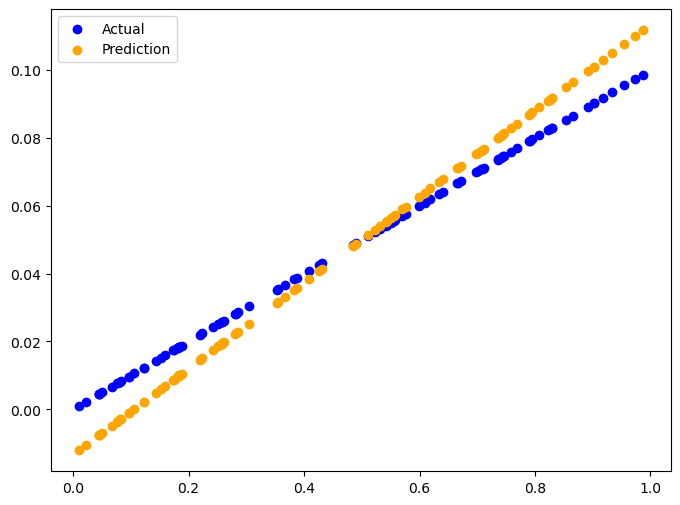

epoch 10, W: 0.1189, Error: 0.0051


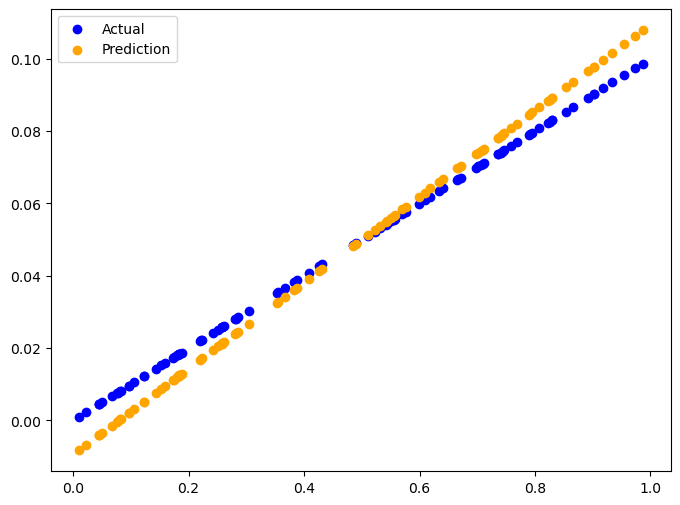

epoch 20, W: 0.1133, Error: 0.0036


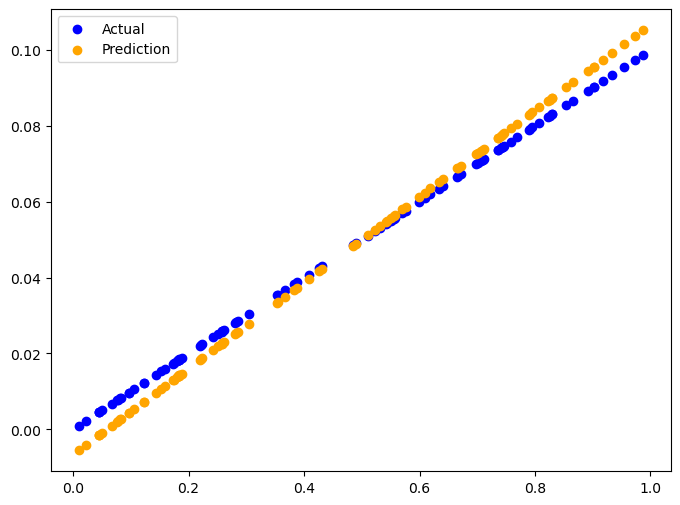

epoch 30, W: 0.1094, Error: 0.0025


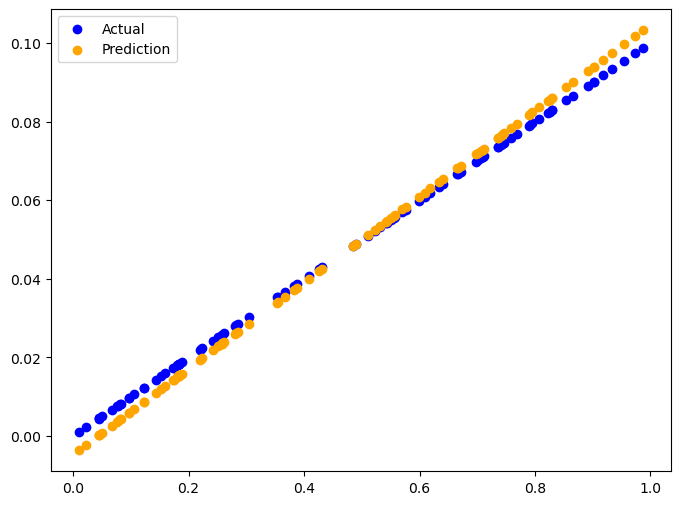

epoch 40, W: 0.1067, Error: 0.0018


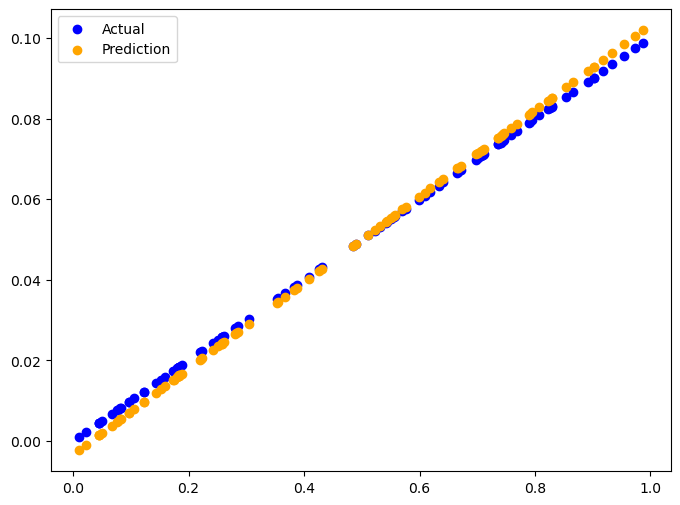

epoch 50, W: 0.1047, Error: 0.0013


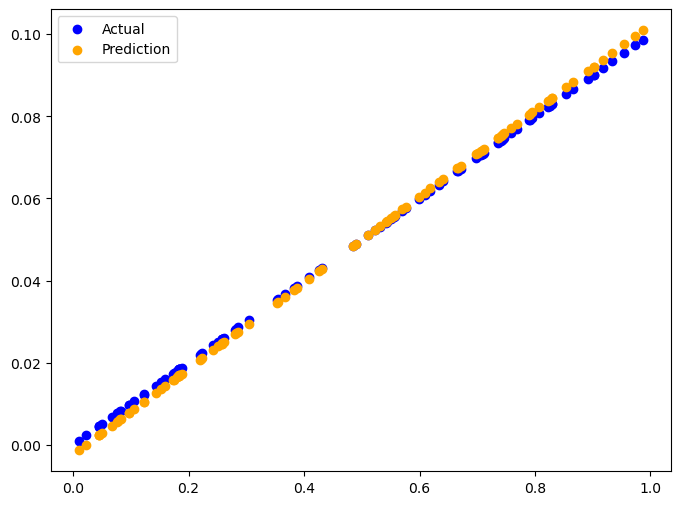

In [9]:
for epoch in range(100):
    y_pred=W*X+b
    error=np.abs(y_pred-y).mean()
    if error<0.001:  #최적의 W값을 찾은것
        break
    W_descent=learning_rate * ( (y_pred-y)*X).mean()
    b_descent=learning_rate * ( (y_pred-y).mean())
    W= W-W_descent
    b= b -b_descent
    
    if epoch%10==0:
        print (f'epoch {epoch}, W: {W:.4f}, Error: {error:.4f}')
        y_pred=W*X+b
        plt_prediction(y_pred,y)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
bostondf = pd.read_csv('./data/boston.csv')
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
X=bostondf.drop('target',axis=1).values
y=bostondf['target'].values
bostondf.shape

(506, 14)

In [17]:
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [21]:
bostondf.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
bostondf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

#### 각 컬럼별 고유값 개수

In [24]:
bostondf.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
target     229
dtype: int64

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=156)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test) #예측값 설정
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [30]:
# 평가
mse =mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse,mse

(np.float64(4.158956107955705), np.float64(17.296915907902065))

In [31]:
# 결정계수
r2_score(y_test, y_pred)

np.float64(0.7572263323138934)

In [ ]:
# 회귀식
# w1,w0
lr.intercept_, lr.coef_ 


(np.float64(40.99559517216439),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

In [ ]:
# y=w0+w1*w2*X2+...w13*X13
np.round(lr.intercept_,1),np.round(lr.coef_,1)

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [35]:
pd.Series(data=np.round(lr.coef_,1), index=
          bostondf.drop('target',axis=1).columns.sort_values(ascending=False))

ZN         -0.1
TAX         0.1
RM          0.0
RAD         3.0
PTRATIO   -19.8
NOX         3.4
LSTAT       0.0
INDUS      -1.7
DIS         0.4
CRIM       -0.0
CHAS       -0.9
B           0.0
AGE        -0.6
dtype: float64

## Cross-validation

In [36]:
from sklearn.model_selection import cross_val_score
neg_mse_scores=cross_val_score(lr, X,y, scoring='neg_mean_squared_error',cv=5)
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [37]:
#MSE, RMSE
RMSE=np.sqrt(neg_mse_scores*-1)
np.mean(RMSE),RMSE

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [38]:
r2_scores=cross_val_score(lr,X,y,scoring='r2',cv=5)
r2_scores,np.mean(r2_scores)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

#### 결과 : 오차는 커졌고(4.15 --> 5.82), 결정계수는 작아짐

## 다항회귀 모델

 y=w0 + w1X1 + w2X2 + w3X1^2 + w4X2^2

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=156)
model_poly=Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('Linear',LinearRegression())]
)
model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('Linear', LinearRegression())])

In [47]:
pred_poly=model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(15.555752307472005)

In [48]:
r2_score(y_test, pred_poly)

np.float64(0.7816647163338353)

In [68]:
### 2차~5차 다항회귀 시물레이션

results=[]

for degree in range(1,5):
  model_poly=Pipeline([
  ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
  ('linear',LinearRegression())]
  )
  model_poly.fit(X_train, y_train)
  pred_poly=model_poly.predict(X_test)
  mse=mean_squared_error(y_test, pred_poly)
  rmse=np.sqrt(mse)
  r2=r2_score(y_test,pred_poly)

  results.append({'degree':degree,
                'MSE':mse,
                'RMSE':rmse,
                'R2':r2})


pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,17.296916,4.158956,0.757226
1,2,15.555752,3.944078,0.781665
2,3,79625.592348,282.180071,-1116.597912
3,4,170599.948638,413.037466,-2393.483240
